# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Семинар 1

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


-----

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_palette("Set2")

%matplotlib inline

Пусть нам попались какие-то данные.

В данном случае - 100 различных значений какой-то величины.

In [2]:
size = 100
sample = sps.norm.rvs(size=size) #генерируем реализацию выборки из стандартного нормального распределения

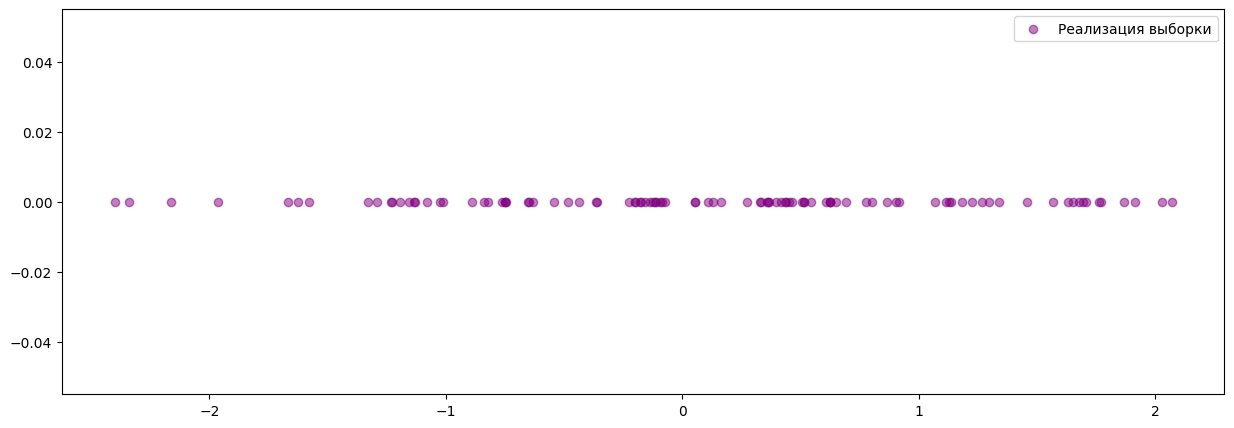

In [3]:
# рисуем график
# по оси x - значения реализаций случайной величины

plt.figure(figsize=(15, 5))
plt.scatter(sample, np.zeros(size), alpha=0.5, color='purple', label="Реализация выборки")
plt.legend()
plt.show()

Для начала давайте попробуем прикинуть, как распределены данные:

## Гистограмма

Идея: разделим всю числовую прямую на несколько "корзин" и посмотрим, сколько объектов попало в каждую.

Формально: $X_1, \ldots X_n$ - выборка.

$-\infty = a_0 < \ldots < a_i < \ldots < a_{m} = +\infty$ - разбиение на $m$ корзин.

$n_k = \sum \limits_{i=0}^{n-1} I(X_i \in [a_k, a_{k+1}])$ - количество элементов в $i$-й корзине.


Можно построить график в виде столбиков, где высота столбика показывает, сколько объектов попало в соответствующую корзину.

Этот график по форме похож на график плотности распределения нашей случайной величины.



Гистограмму можно построить с помощью библиотеки matplotlib.

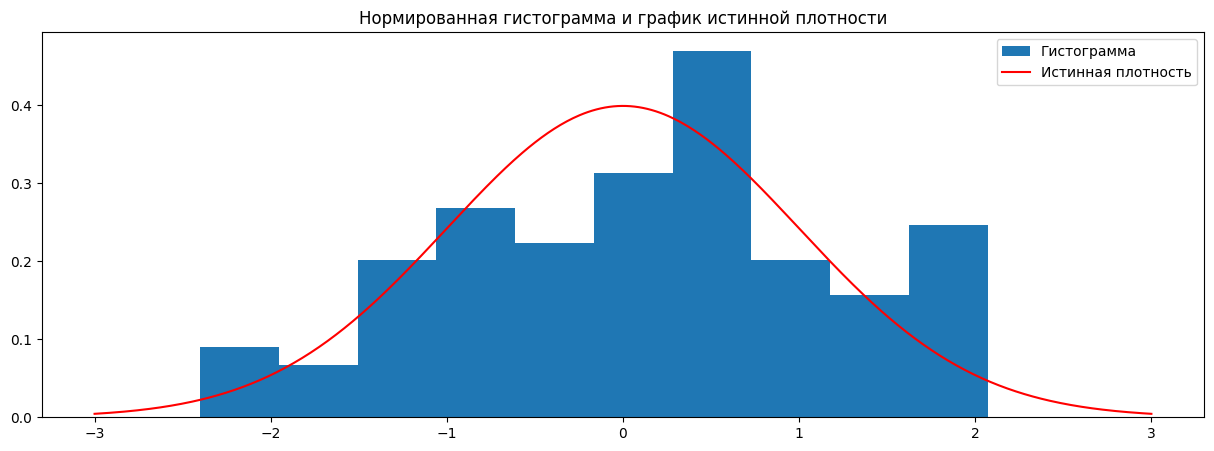

In [4]:
plt.figure(figsize=(15, 5))

plt.title("Нормированная гистограмма и график истинной плотности")

plt.hist(x=sample, bins = 10, density=True, label = "Гистограмма") 
#x - данные, bins - количество корзин, density - нормируем, так что сумма высот столбиков равна 1

grid = np.linspace(-3, 3, 500)

plt.plot(grid, sps.norm.pdf(grid), color='red', label='Истинная плотность')

plt.legend()

plt.show()

Другой способ:

Для построения гистограммы удобно использовать библиотеку seaborn (подробнее - в туториалах).

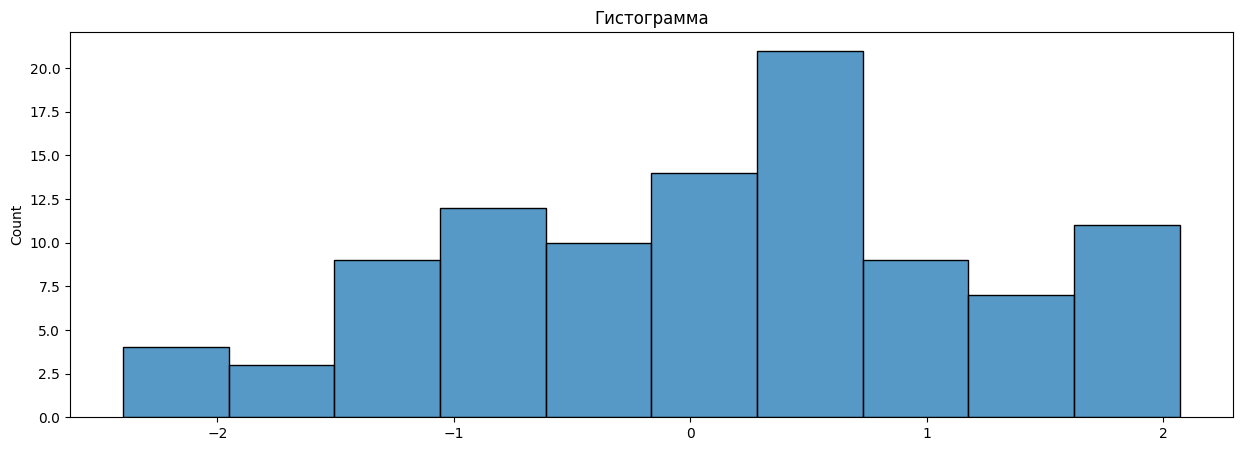

In [5]:
plt.figure(figsize=(15, 5))

plt.title("Гистограмма")

sns.histplot(data=sample, bins = 10)
#data - наши данные, bins - количество корзин

plt.show()

Посмотрим, на что влияет количество корзин.

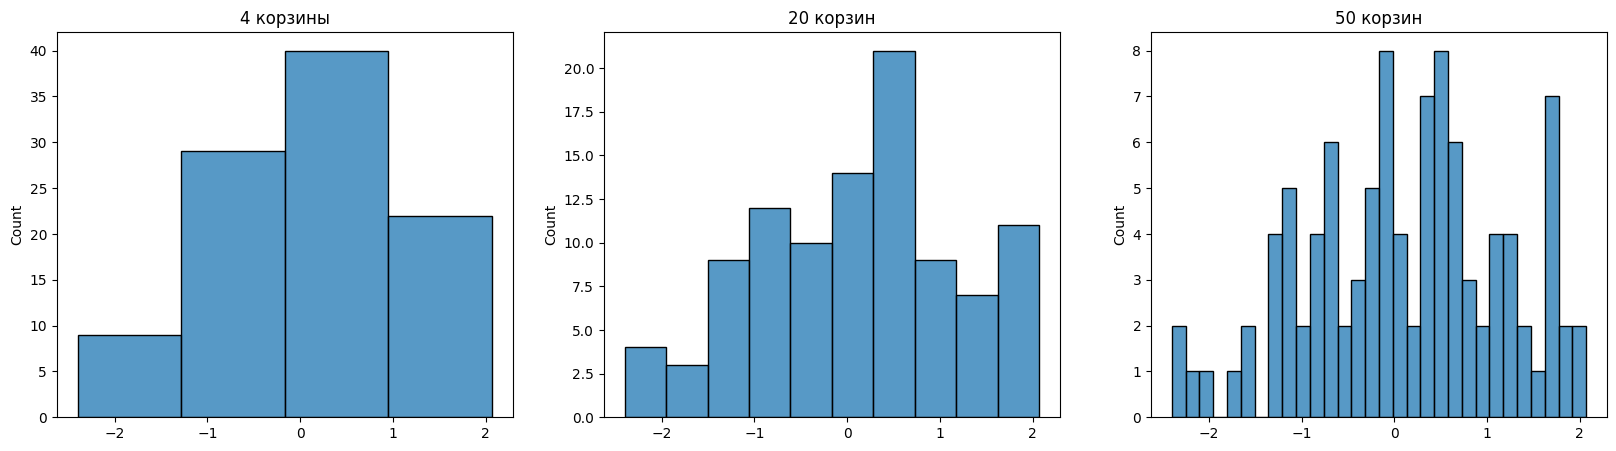

In [6]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=3)

axs[0].set_title("4 корзины" )
axs[1].set_title("20 корзин" )
axs[2].set_title("50 корзин" )


sns.histplot(data=sample, bins = 4, ax=axs[0])
sns.histplot(data=sample, bins = 10, ax=axs[1])
sns.histplot(data=sample, bins = 30, ax=axs[2])


#data - наши данные, bins - количество корзин

plt.show()

## Задание 1
Рассмотрим функцию `np.random.randint()`.

Выберите любые значения a и b и создайте массив рандомных чисел от a до b (размер массива 100).

In [7]:
N = 100
a = 1
b = 1000

rand_int_numbers = np.random.randint(a, b, N)

Постройте гистограмму для этого массива.

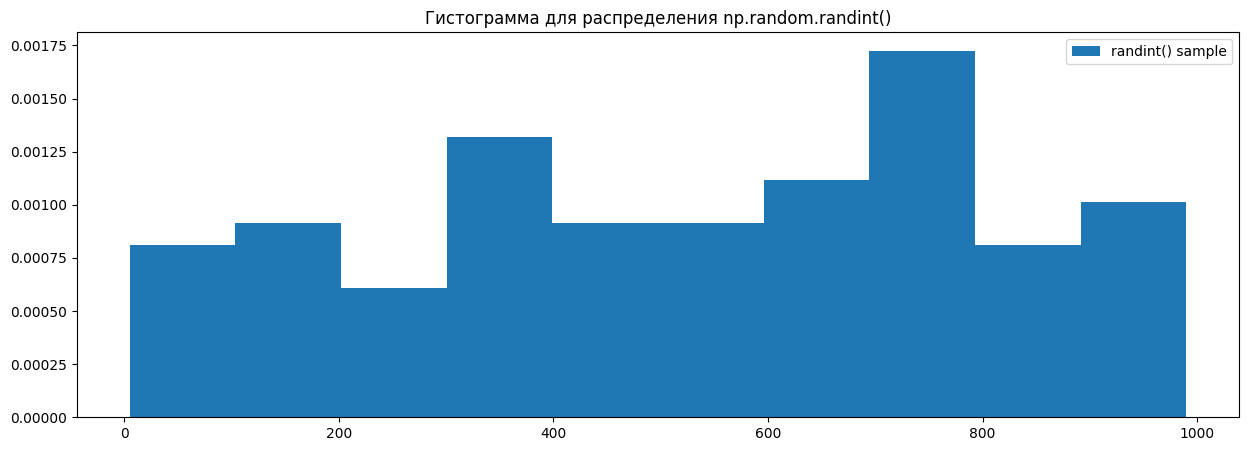

In [8]:
plt.figure(figsize=(15, 5))
plt.title("Гистограмма для распределения np.random.randint()")

plt.hist(rand_int_numbers, bins=10, density=True, label="randint() sample")

plt.legend()
plt.show()

Постройте более четкий график, увеличив параметр `bins`.

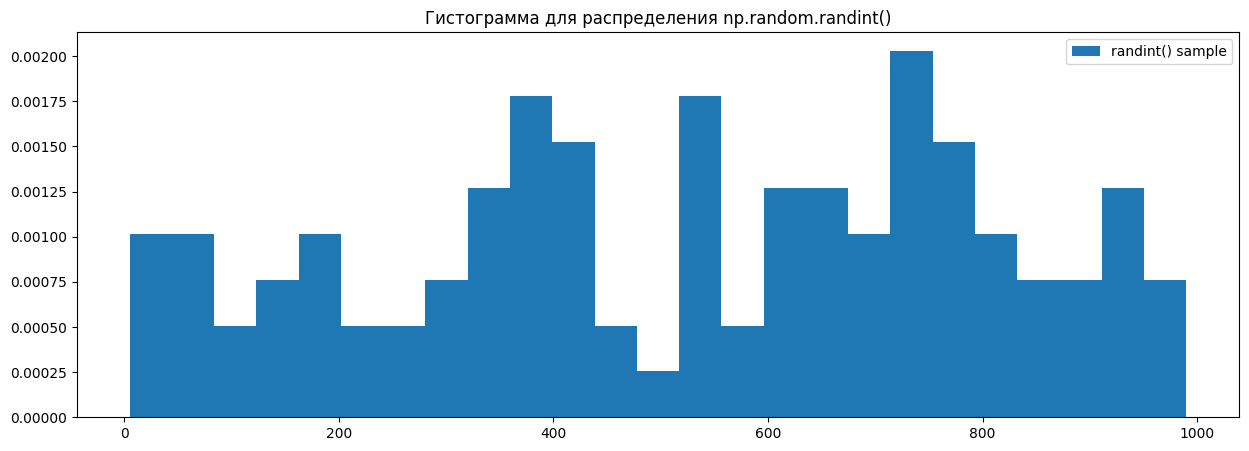

In [9]:
plt.figure(figsize=(15, 5))
plt.title("Гистограмма для распределения np.random.randint()")

plt.hist(rand_int_numbers, bins=25, density=True, label="randint() sample")

plt.legend()
plt.show()

Создайте массив sizes, который будет состоять из 1e2, 1e3, 1e4, 1e5 (используйте `np.logspace()`). Числа должны быть целыми.

In [10]:
sizes = np.logspace(start=2, stop=5, num=4, base=10, dtype=int)

Постройте plt.subplots в виде строки из 4 графиков. Параметр `bins` укажите 100. На каждом графике отрисуйте гистограмму массива заданного размера из массива sizes. Подпишите, какой размер массивы к какому графику относится.

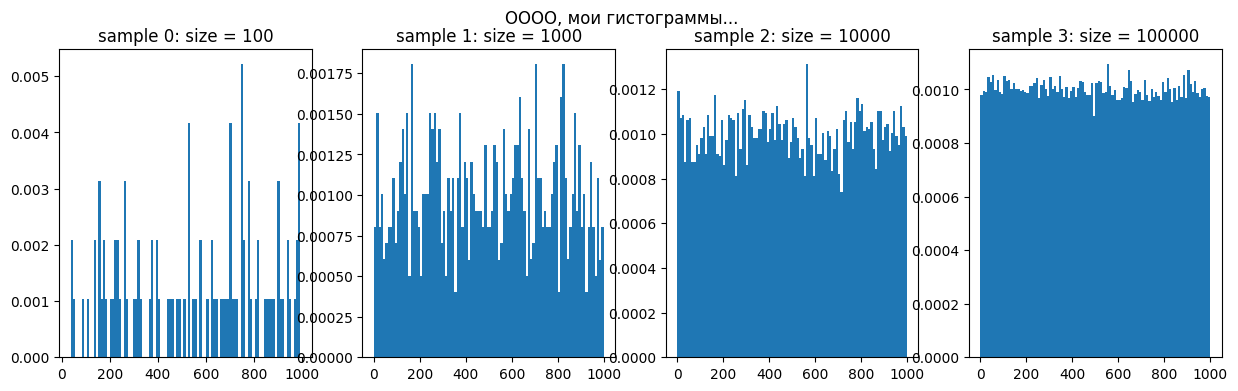

In [11]:
a = 1
b = 1000

samples = [np.random.randint(a, b, N) for N in sizes]

fig, axs = plt.subplots(1, 4, figsize=(15, 4))

for i in range(len(axs)):
    axs[i].hist(samples[i], bins=100, density=True)
    axs[i].set_title(f"sample {i}: size = {sizes[i]}")
    
fig.suptitle("ОООО, мои гистограммы...")
plt.show()

На какое распределение похоже?

Очень напоминает величину, распределённую равномерно

## Задание 2*
Напишите собственную реализацию нормального распределения. Создайте класс и определите в нем функцию _pdf. Напомню, что плотность нормального распределения расчитывается следующим образом:
$$ \frac{1}{\sigma \sqrt{2 \pi}} exp \left( -\frac{(x-\mu)^2}{2 \sigma ^2}\right)$$
Для построения функции возьмите $\mu$ = 0, $\sigma$ = 1


In [12]:
class MyDistributions():
    def _pdf(self, mu=0, sigma=1, size=100, **kwargs):
        sample = []
        for _ in range(size):
            uniform_rv1 = np.random.random()
            uniform_rv2 = np.random.random()
            exponential_rv1 = -np.log(uniform_rv1)
            exponential_rv2 = -np.log(uniform_rv2)
                
            while 2 * exponential_rv2 <= (exponential_rv1 - 1) ** 2:
                uniform_rv1 = np.random.random()
                uniform_rv2 = np.random.random()
                exponential_rv1 = -np.log(uniform_rv1)
                exponential_rv2 = -np.log(uniform_rv2)

            normal_rv = np.sign(np.random.random() - 0.5) * exponential_rv1
            sample.append(mu + sigma * normal_rv)
            
        return sample

Сгенерируйте выборку из 2000 элементов. Засеките время генерации выборки.

In [13]:
import time

start_time = time.perf_counter_ns()
sample = MyDistributions()._pdf(size=2000)
print(f"Время генерации семпла из 2000 элементов с помощью MyDistributions()._pdf: {(time.perf_counter_ns() - start_time) / 1e9}, sec")


Время генерации семпла из 2000 элементов с помощью MyDistributions()._pdf: 0.0110937, sec


Постройте гистограмму для вашей выборки

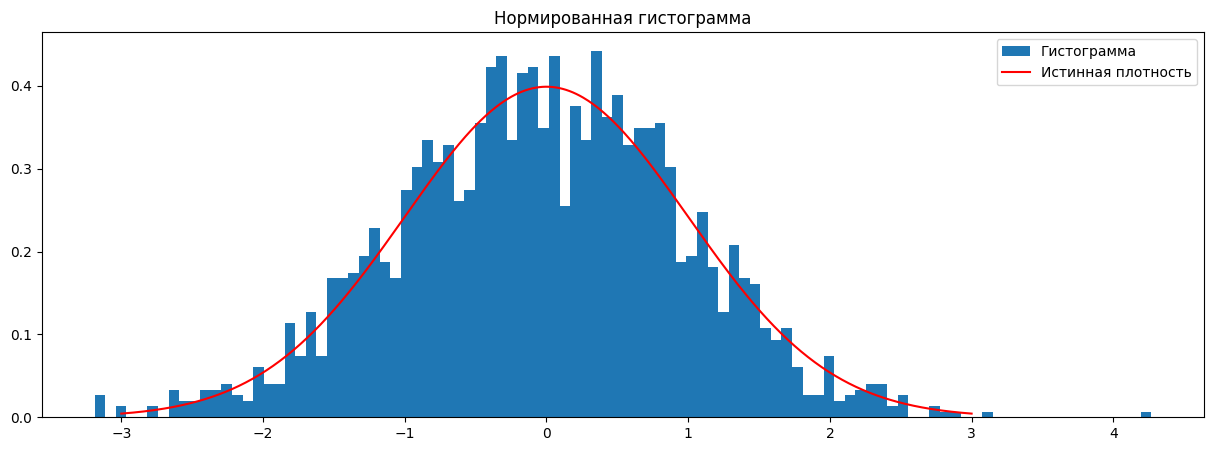

In [14]:
plt.figure(figsize=(15, 5))

plt.title("Нормированная гистограмма")

plt.hist(x=sample, bins = 100, density=True, label = "Гистограмма") 
#x - данные, bins - количество корзин, density - нормируем, так что сумма высот столбиков равна 1
grid = np.linspace(-3, 3, 500)

plt.plot(grid, sps.norm.pdf(grid), color='red', label='Истинная плотность')

plt.legend()

plt.show()

Сравните время работы вашей реализации и реализации из `scipy.stats`

In [15]:
start_time = time.perf_counter_ns()
sample = MyDistributions()._pdf(size=2000)
print(f"Время генерации семпла из 2000 элементов с помощью MyDistributions()._pdf: {(time.perf_counter_ns() - start_time) / 1e9}, sec")

start_time = time.perf_counter_ns()
sample = sps.norm.rvs(size=2000)
print(f"Время генерации семпла из 2000 элементов с помощью sps.norm.rvs: {(time.perf_counter_ns() - start_time) / 1e9}, sec")

Время генерации семпла из 2000 элементов с помощью MyDistributions()._pdf: 0.0110019, sec
Время генерации семпла из 2000 элементов с помощью sps.norm.rvs: 0.0004405, sec


Как, используя вашу функцию, можно создавать выборки для других значений $\mu$ и $\sigma$? Проиллюстрируйте.

Для этого можо просто поменять значения по умолчанию параметров $\mu$ и $\sigma$ в функции MyDistributions()._pdf

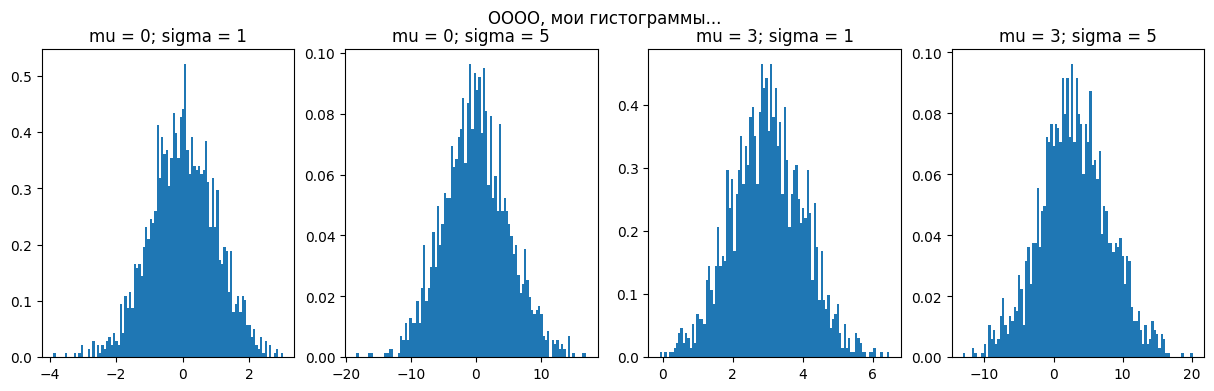

In [16]:
params = [(0, 1), (0, 5), (3, 1), (3, 5)]
samples = [MyDistributions()._pdf(mu=m, sigma=s, size=2000) for m, s in params]

fig, axs = plt.subplots(1, len(params), figsize=(15, 4))

for i in range(len(axs)):
    axs[i].hist(samples[i], bins=100, density=True)
    axs[i].set_title(f"mu = {params[i][0]}; sigma = {params[i][1]}")
    
fig.suptitle("ОООО, мои гистограммы...")
plt.show()

## Ядерная оценка плотности

In [17]:
size = 100
sample = sps.norm.rvs(size=size) 

KDE (kernel density estimation) - непараметричсекий способ оценивания случайной величины.

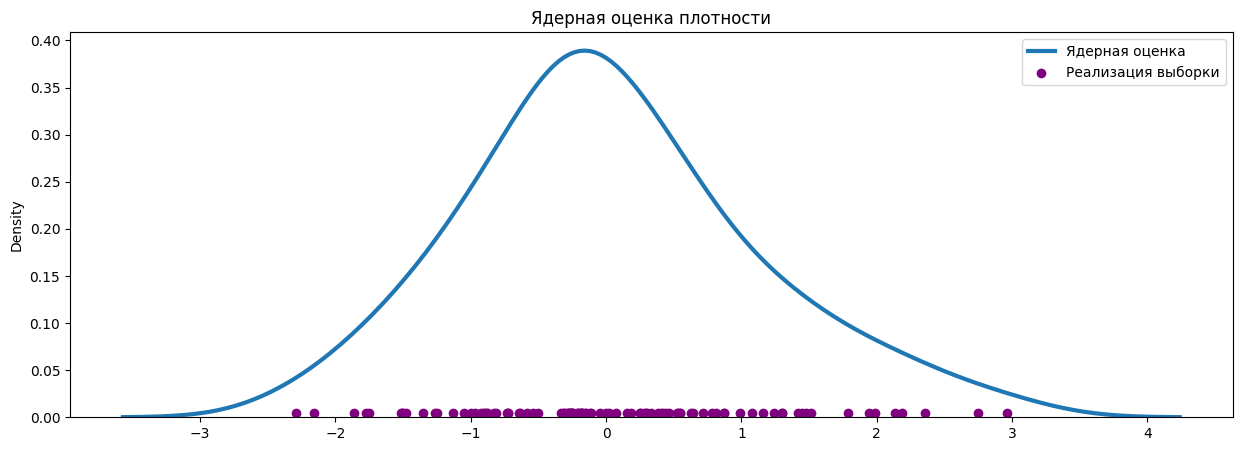

In [18]:
plt.figure(figsize=(15, 5))

plt.title("Ядерная оценка плотности")

sns.kdeplot(data=sample, lw=3, label="Ядерная оценка")

plt.scatter(sample, np.zeros(size)+0.005, color='purple', label='Реализация выборки')

plt.legend()
plt.show()


Сравним график ядерной оценки с графиком истинной плотности.

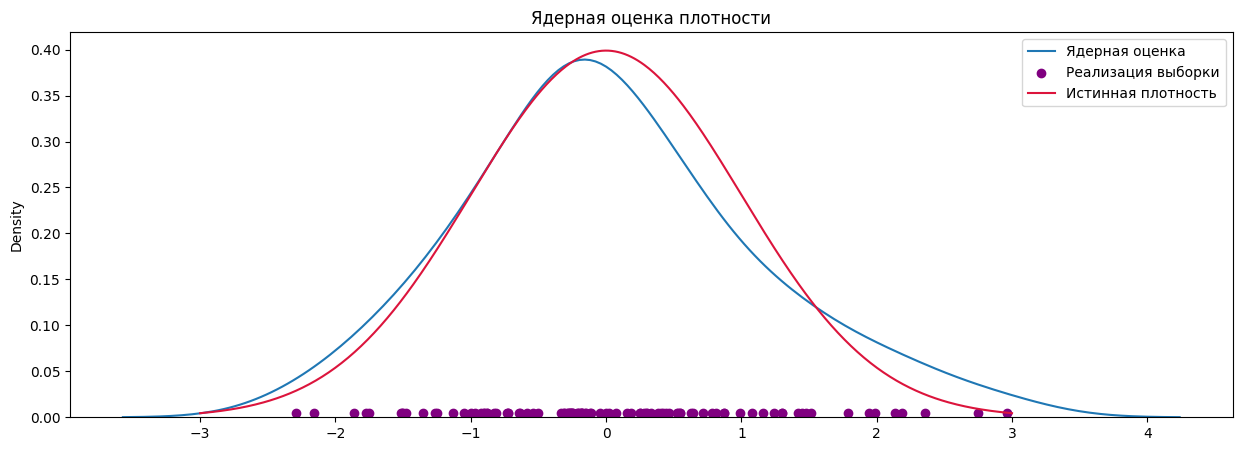

In [19]:
plt.figure(figsize=(15, 5))

plt.title("Ядерная оценка плотности")

sns.kdeplot(data=sample, label="Ядерная оценка")

plt.scatter(sample, np.zeros(size)+0.005, color='purple', label='Реализация выборки')

plt.plot(grid, sps.norm.pdf(grid), color='crimson', label='Истинная плотность')


plt.legend()
plt.show()

Также метод histplot позволяет сразу строить и гистограмму, и ядерную оценку плотности.

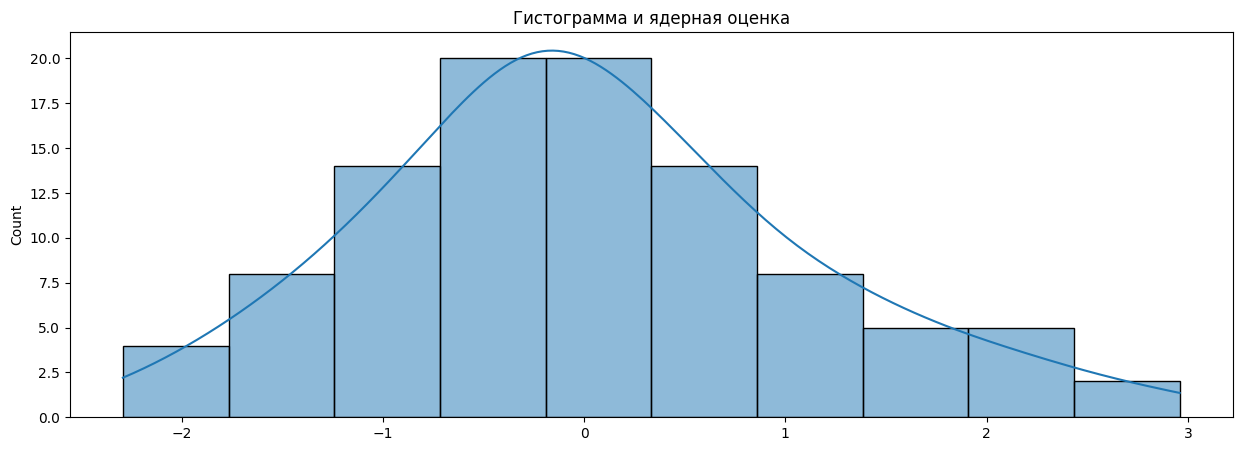

In [20]:
plt.figure(figsize=(15, 5))

plt.title("Гистограмма и ядерная оценка")

sns.histplot(data=sample, kde=True)
plt.show()

## Точечные оценки

Рассмотрим **выборочное среднее**.

$\overline{X}  = \sum\limits_{i=1}^n X_i$

Сгенерируем выборку из $\mathcal{N}(3, 25)$ размера 1000:


In [21]:
size = 1000
sample = sps.norm(loc=3, scale=5).rvs(size=size) #генерируем реализацию выборки из стандартного нормального распределения

Посчитаем выборочное среднее

In [22]:
mean = sample.sum() / size

print("Выборочное среднее:", mean)

Выборочное среднее: 3.0719751521480148


Что хорошего может нам дать эта величина?

Давайте посмотрим, как она ведет себя с ростом размера выборки!

Посчитаем выборочное среднее по всем префиксам выборки ($j \in {1, \ldots n}$):

$(\overline{X} )_j = \sum\limits_{i=1}^j X_i$

In [23]:
means = sample.cumsum() / (np.arange(size) + 1)

Построим график зависимости среднего от размера префикса:

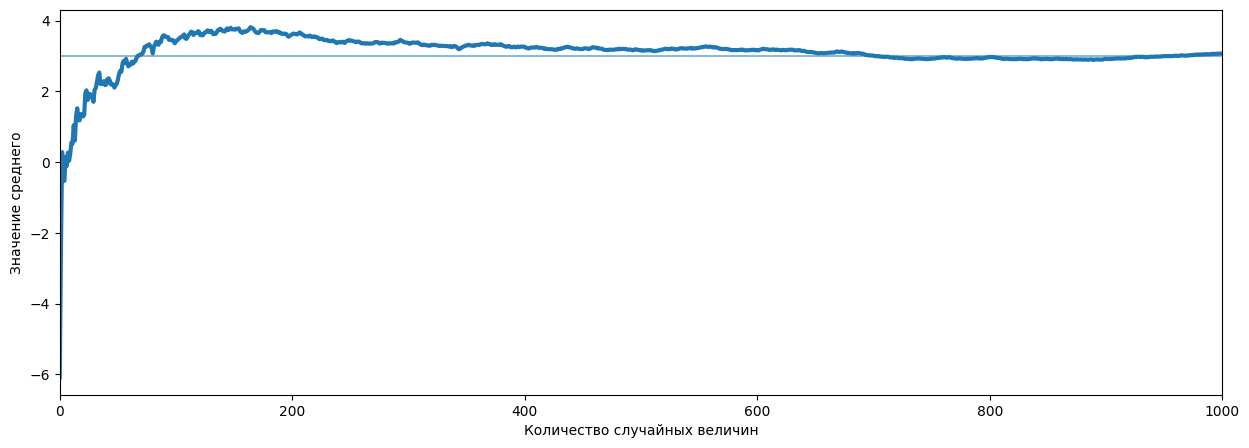

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(means, lw=3)
plt.hlines(3, 0, size, alpha=0.5)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Но одного эксперимента мало, чтобы понять свойства вероятностных объектов. **Запомните это!**

Повторим эксперимент 10 раз **независимо**.

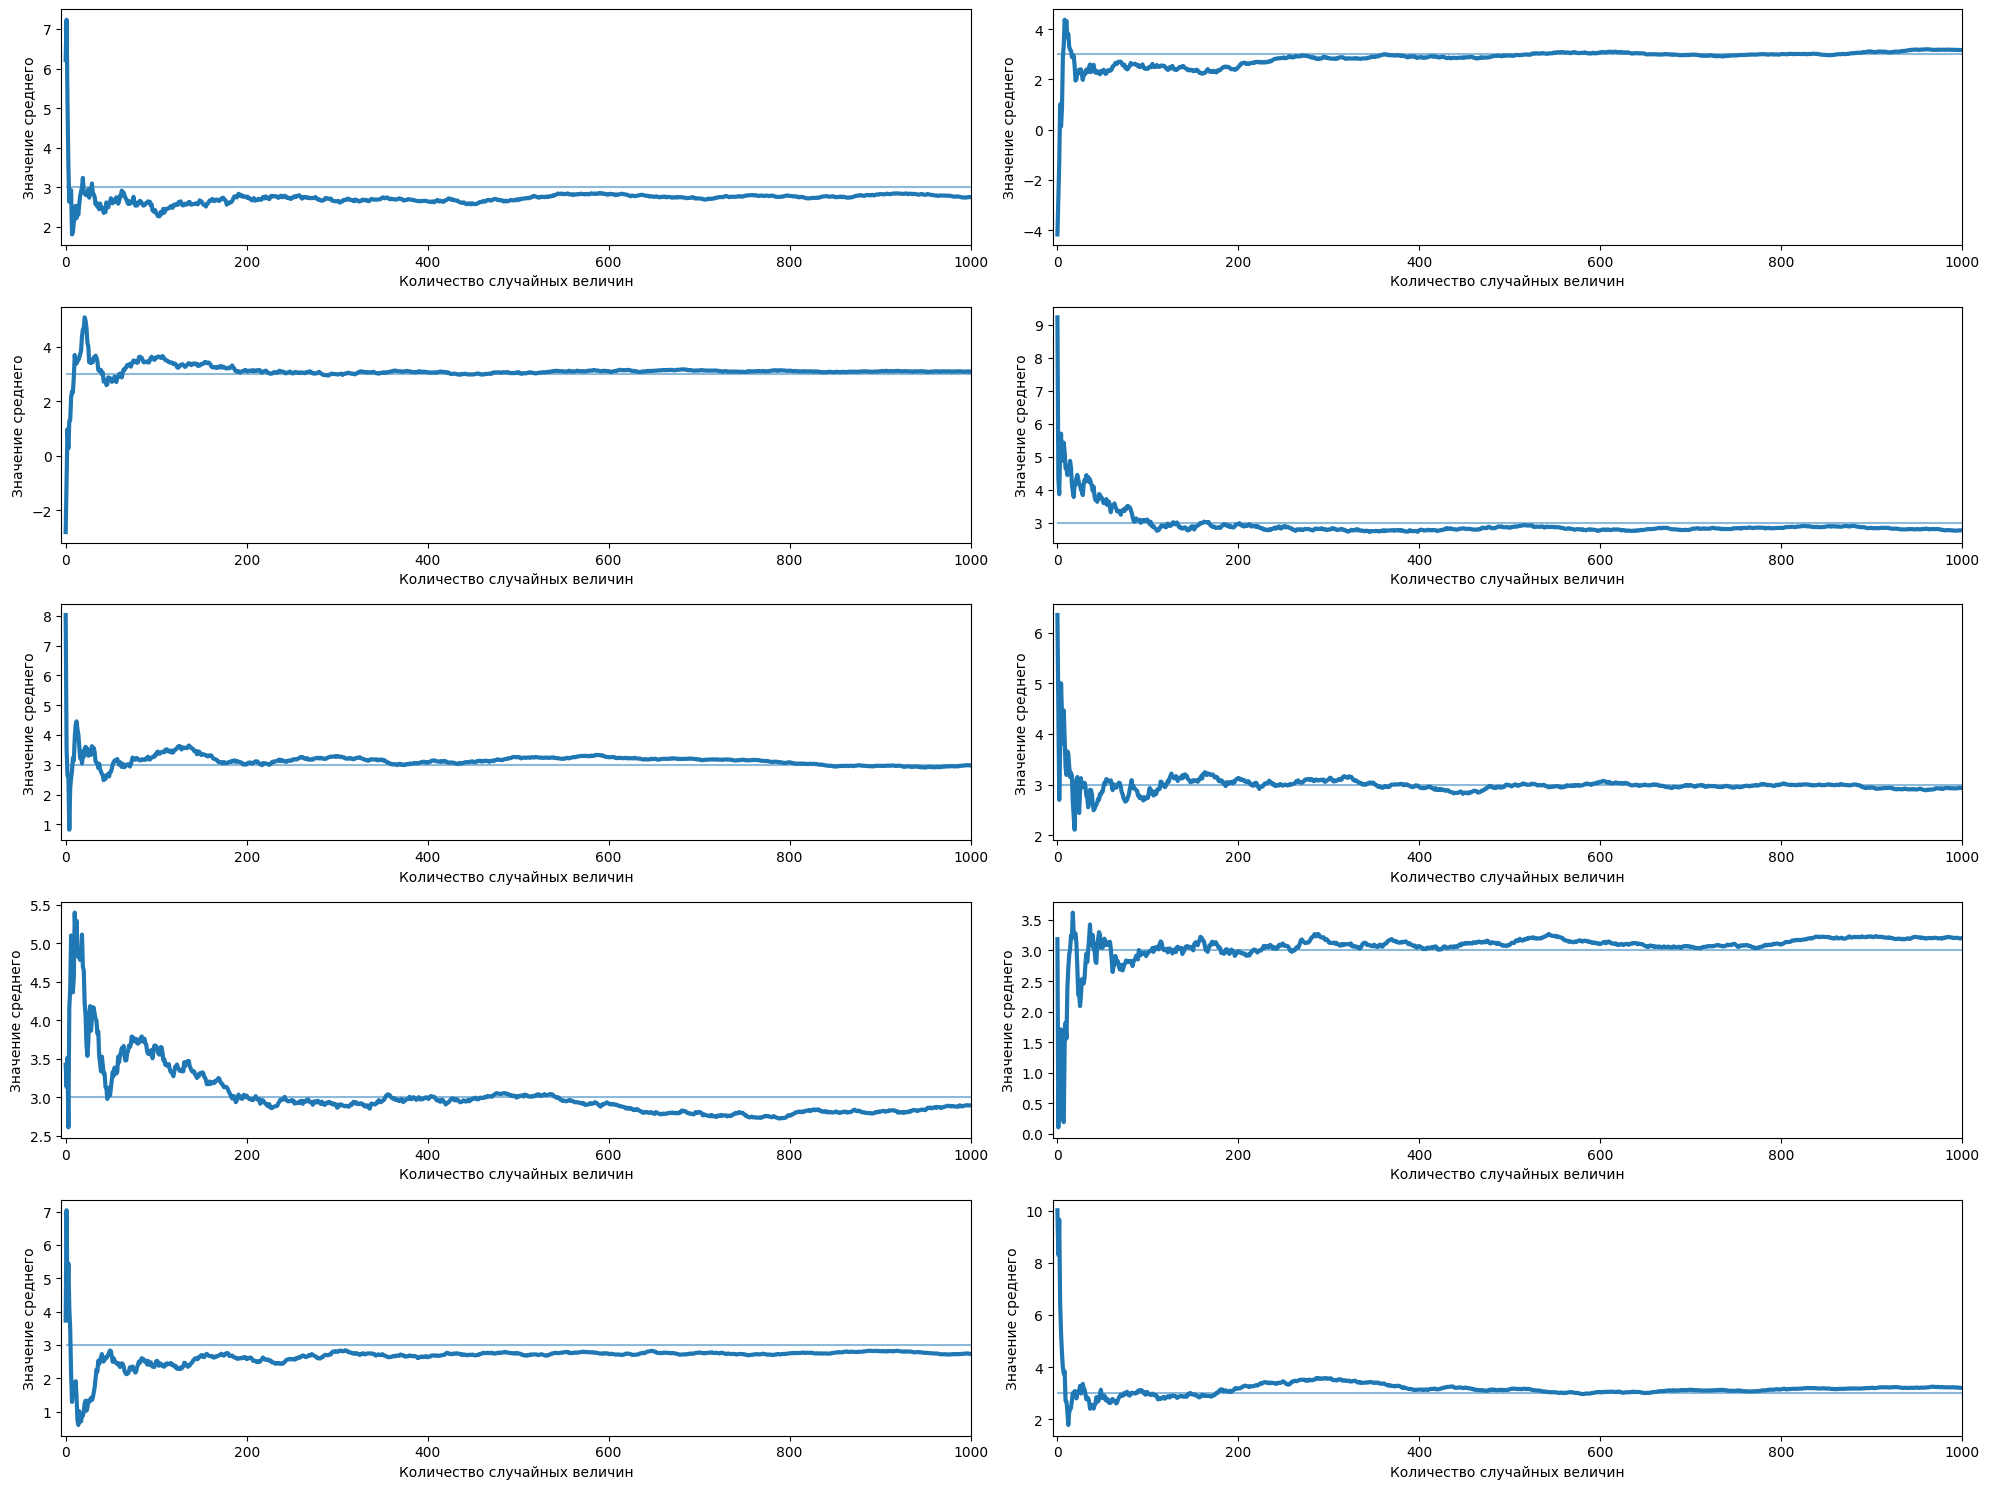

In [25]:
plt.figure(figsize=(20, 15))

for i in range(10):

    # Генерация выборки и вычисление средних
    sample = sps.norm(loc=3, scale=5).rvs(size=size)
    means = sample.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(means, lw=3)
    plt.hlines(3, 0, size, alpha=0.5)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.tight_layout()

Как видим, со временем график среднего приближается к значению параметра $a$ нормального распределения.

Вспомним теорию вероятностей!

## Закон больших чисел

#### Формулировка

Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из некоторого распределения, причем $\mathsf{E}\xi_i = a$. Тогда выполнена сходимость $$\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\longrightarrow} a.$$ 

*Замечание 1.* Закон больших чисел имеет несколько формулировок. Данная формулировка часто называется *усиленным законом больших чисел*. В частности, усиленной она является, поскольку в отличии от "простой" версии она не требует условия на дисперсии и утверждает о более сильной сходимости "почти наверное".

*Замечание 2.* Последовательность случайных величин $\xi_1, \xi_2, ...$ сходится почти наверное к случайной величине $\xi$, если $\mathsf{P}\big(\big\{ \omega \in \Omega\:\big|\: \xi_n(\omega) \to \xi(\omega)\big\}\big) = 1$

---

####  Визуализация

Убедимся в справедливости ЗБЧ, сгенерировав набор из случайных величин  $\xi_1, ..., \xi_{1000}$ и посчитав по нему среднее в зависимости от размера набора, то есть величины $S_{n} = \frac{1}{n}\sum\limits_{i=1}^n \xi_i$ для $1 \leqslant n \leqslant 1000$.

Для примера рассмотрим бернуллиевское распределение.







In [26]:
size = 1000
samples_count = 500

sample = sps.bernoulli(p=0.5).rvs(size=(samples_count, size))
means = sample.cumsum(axis=1) / (np.arange(size) + 1)

Нарисуем траектории среднего для всех реализациий на одном графике.

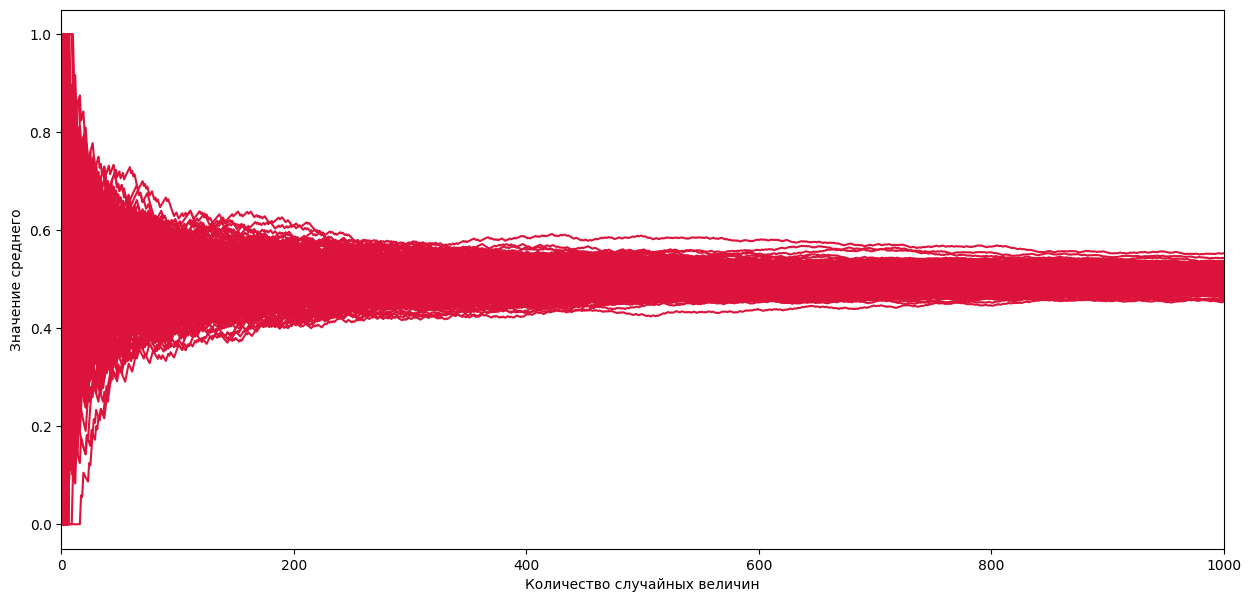

In [27]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

В подобных "тяжелых" графиках нужно выставлять прозрачность объектов

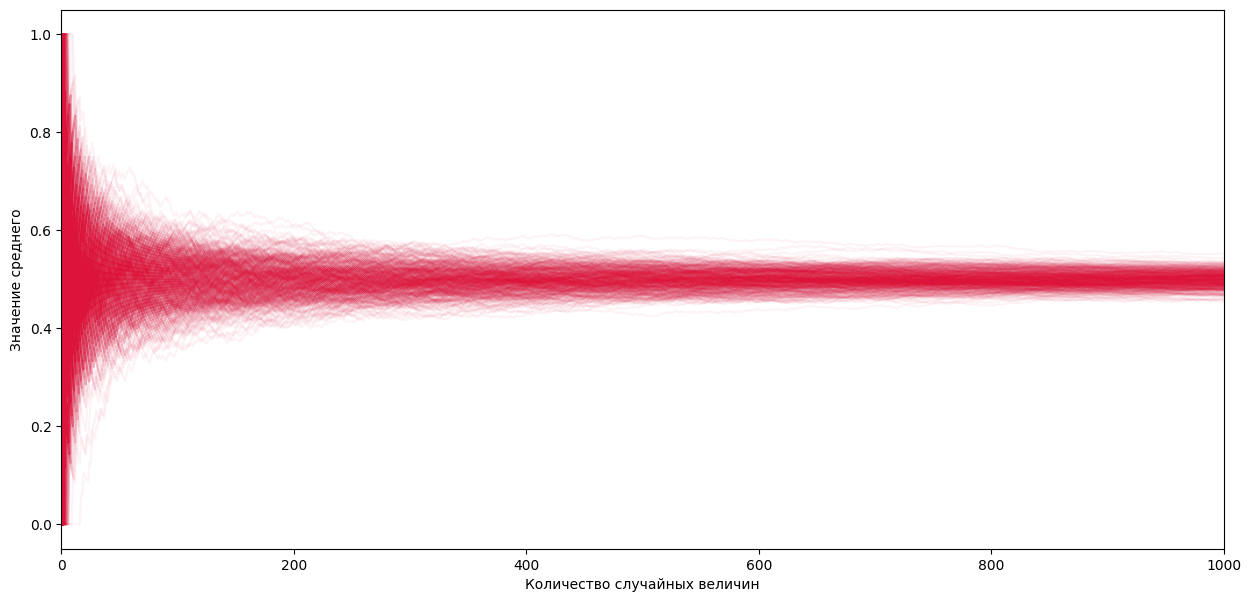

In [28]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Поставим ее еще меньше

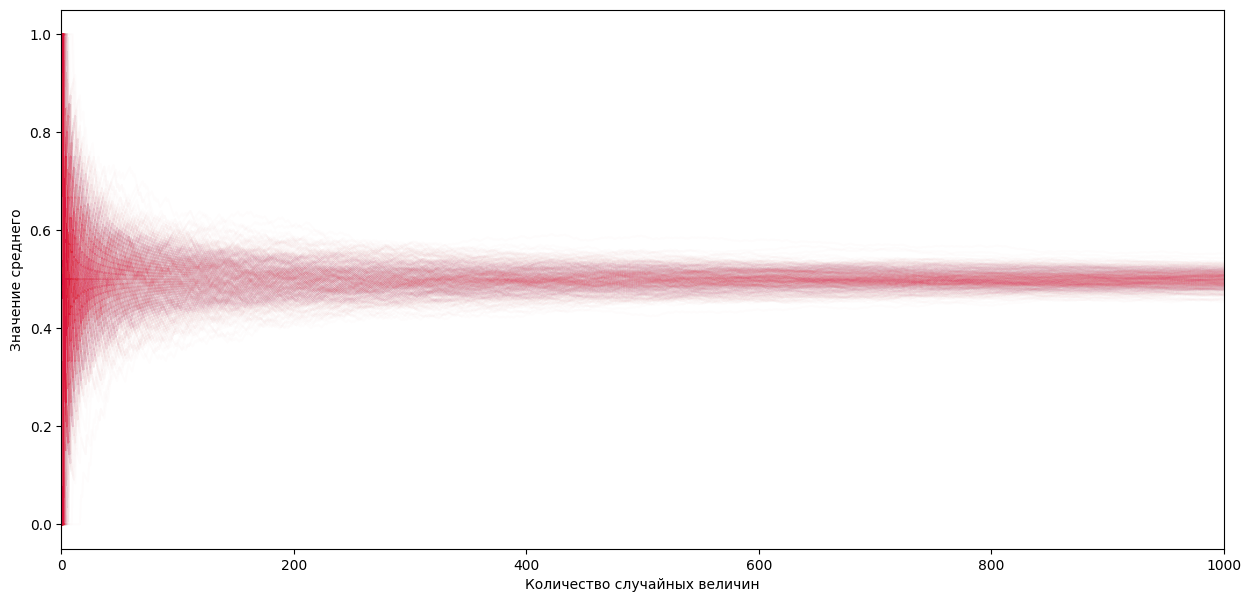

In [29]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson', alpha=0.01)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

**Вывод:** При достаточность большом количестве случайных величин значение среднего не сильно
отклоняется от математического ожидания, причем чем больше случайных величин просуммированы, тем меньше отклонения. Данный эксперимент хорошо визуализирует закон больших чисел.


Таким образом, в данном случае выборочное среднее -- "хорошая оценка", т.к. с ростом выборки его значение приближается к истинному значению параметра.


Это  эксперимент намекает нам, что некоторые оценки могут быть "хорошими" в каком-лмбо смысле. О том, какие у оценок бывают "хорошие" свойства -- на следующих занятиях!

## Задание 3
Проведите подобный эксперимент для ядерной оценки плотности. 

Сгенерируйте 100 выборок по 1000 элементов из нормального распределения ($\mu$=0, $\sigma$=1). 

In [30]:
size = 100
samples_count = 100
sample = sps.norm.rvs(size=(samples_count, size))
sample.shape

(100, 100)

Отрисуйте их ядерные оценки плотности на одном графике.  На этом же графике отрисуйте плотность искомого распределения

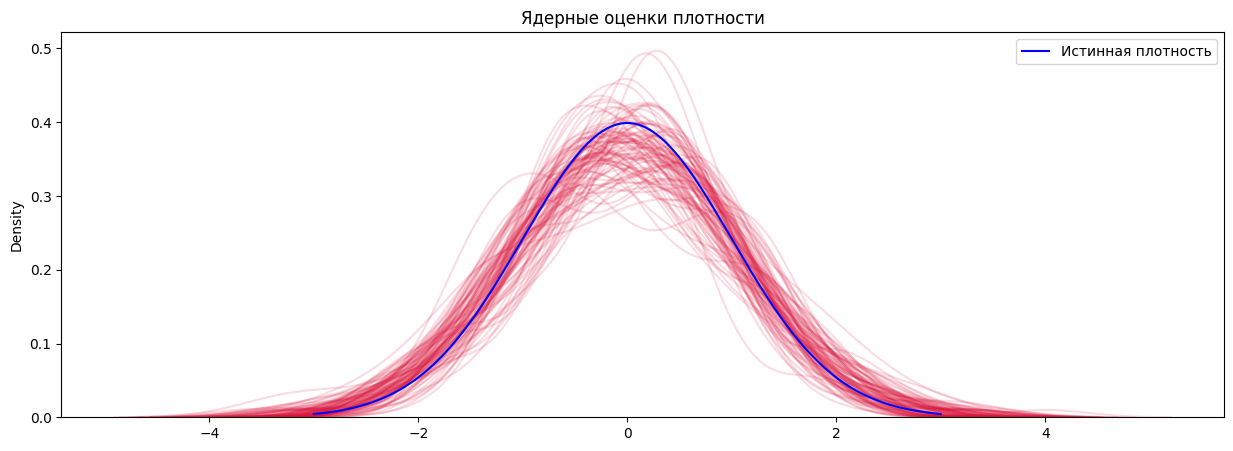

In [31]:
plt.figure(figsize=(15, 5))

plt.title("Ядерные оценки плотности")

for i in range(samples_count):
    sns.kdeplot(data=sample[i], color='crimson', alpha=0.15)

plt.plot(grid, sps.norm.pdf(grid), color='blue', label='Истинная плотность')

plt.legend()
plt.show()

Увеличьте размер выборок до 1000 и повторите эксперимент.

In [32]:
size = 1000
samples_count = 100
sample = sps.norm.rvs(size=(samples_count, size))
sample.shape

(100, 1000)

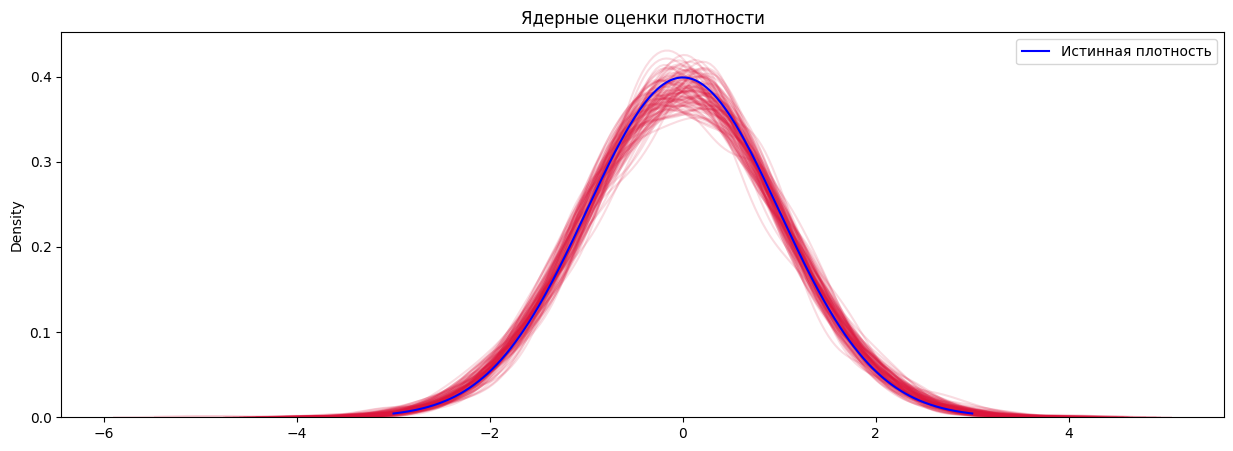

In [33]:
plt.figure(figsize=(15, 5))

plt.title("Ядерные оценки плотности")

for i in range(samples_count):
    sns.kdeplot(data=sample[i], color='crimson', alpha=0.15)

plt.plot(grid, sps.norm.pdf(grid), color='blue', label='Истинная плотность')

plt.legend()
plt.show()

А теперь наоборот - поставьте размер выборки 100, а кол-во - 1000 и повторите эксперимент.

In [36]:
size = 100
samples_count = 1000
sample = sps.norm.rvs(size=(samples_count, size))
sample.shape

(1000, 100)

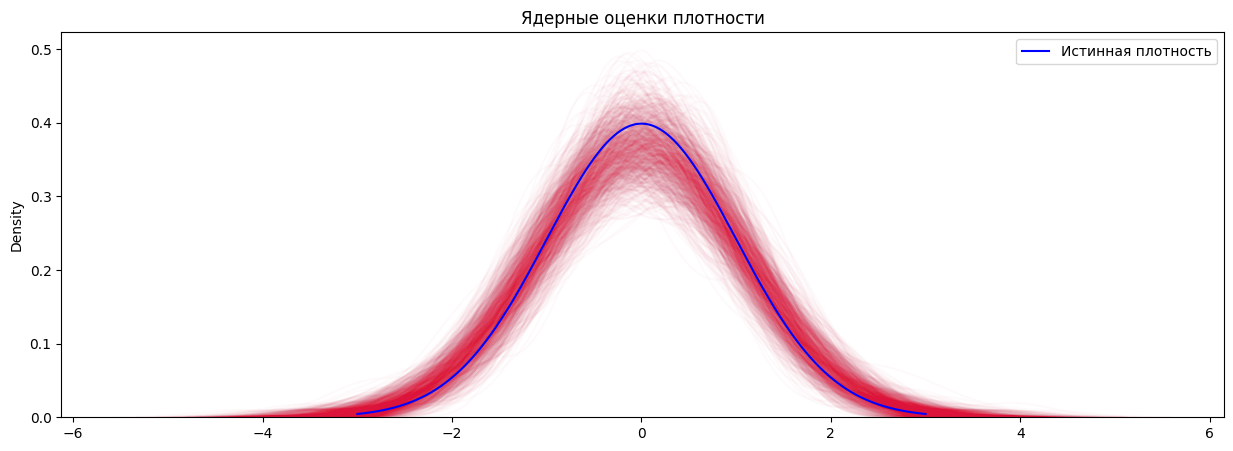

In [40]:
plt.figure(figsize=(15, 5))

plt.title("Ядерные оценки плотности")

for i in range(samples_count):
    sns.kdeplot(data=sample[i], color='crimson', alpha=0.02)

plt.plot(grid, sps.norm.pdf(grid), color='blue', label='Истинная плотность')

plt.legend()
plt.show()